In [ ]:
import torch
import torch.nn as nn

In [ ]:
X = torch.tensor([1,2,3,4],dtype=torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)

w = torch.tensor(.0,dtype=torch.float32,requires_grad=True)

def forward(x):
  return w*x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#training
learning_rate = .01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
  #prediction-fwd pass
  y_pred = forward(X)

  #loss
  l = loss(Y,y_pred)

  #gradients = backward pass
  l.backward()

  #update weights
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')




Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [ ]:
torch.cuda.is_available()

True

In [ ]:
X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test = torch.tensor([5],dtype=torch.float32)

#w = torch.tensor(.0,dtype=torch.float32,requires_grad=True)

n_sample , n_features = X.shape
print(n_sample,n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size,output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') #the input of model can only be a tensor

#training
learning_rate = .01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #prediction-fwd pass
  y_pred = model(X)

  #loss
  l = loss(Y,y_pred)

  #gradients = backward pass
  l.backward()

  #update weights
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w,b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')




4 1
Prediction before training: f(5) = 1.800
epoch 1: w = 0.431, loss = 17.75236130
epoch 11: w = 1.401, loss = 0.70271212
epoch 21: w = 1.568, loss = 0.24742892
epoch 31: w = 1.604, loss = 0.22230625
epoch 41: w = 1.620, loss = 0.20908958
epoch 51: w = 1.632, loss = 0.19691238
epoch 61: w = 1.643, loss = 0.18545073
epoch 71: w = 1.653, loss = 0.17465660
epoch 81: w = 1.663, loss = 0.16449067
epoch 91: w = 1.673, loss = 0.15491657
Prediction after training: f(5) = 9.345


In [ ]:
t = torch.tensor([[2,1],[4,7],[6,9],[8,3]])
n_samples,n_features = t.shape
print(n_samples,n_features)

4 2


In [ ]:
class LinearRegression(nn.Module):

  def __init__(self,input_dim,output_dim):
    super(LinearRegression,self).__init__()
    #define layers
    self.lin =  nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size,output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') #the input of model can only be a tensor

#training
learning_rate = .01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #prediction-fwd pass
  y_pred = model(X)

  #loss
  l = loss(Y,y_pred)

  #gradients = backward pass
  l.backward()

  #update weights
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w,b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = -2.076
epoch 1: w = -0.165, loss = 41.37458420
epoch 11: w = 1.316, loss = 1.29904008
epoch 21: w = 1.564, loss = 0.24888530
epoch 31: w = 1.614, loss = 0.20918506
epoch 41: w = 1.631, loss = 0.19635709
epoch 51: w = 1.643, loss = 0.18491115
epoch 61: w = 1.654, loss = 0.17414795
epoch 71: w = 1.664, loss = 0.16401172
epoch 81: w = 1.674, loss = 0.15446539
epoch 91: w = 1.684, loss = 0.14547472
Prediction after training: f(5) = 9.365


epoch: 10, loss = 4482.1362
epoch: 20, loss = 3339.9722
epoch: 30, loss = 2514.2468
epoch: 40, loss = 1916.6161
epoch: 50, loss = 1483.6204
epoch: 60, loss = 1169.6025
epoch: 70, loss = 941.6657
epoch: 80, loss = 776.0764
epoch: 90, loss = 655.6888
epoch: 100, loss = 568.1035


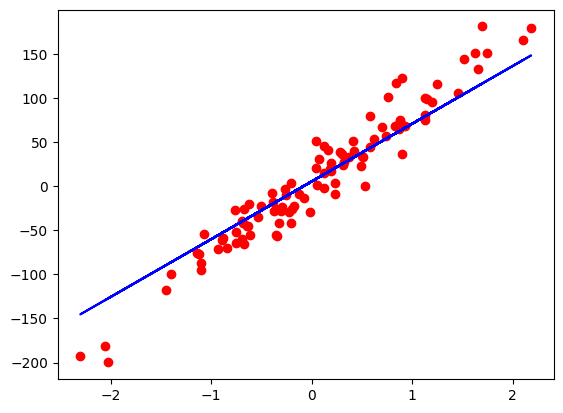

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#0>prepare data
X_nump,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X = torch.from_numpy(X_nump.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples,n_features = X.shape

#1>model
input_size = n_features
output_size = 1

model = nn.Linear(input_size,output_size)

#2>loss and optimizer
criterion = nn.MSELoss()
learning_rate = .01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

#3>training loop
num_epochs = 100
for epoch in range(num_epochs):
  #fwd pass and loss
  y_pred = model(X)
  loss = criterion(y_pred,y)

  #backward pass
  loss.backward()

  #update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


# plot
predicted = model(X).detach().numpy()

plt.plot(X_nump, y_numpy, 'ro')
plt.plot(X_nump, predicted, 'b')
plt.show()
